# 时间序列分析第十次作业

姓名：欧阳瑞志、班级：统计22、学号：220403102

## 一、数据导入
1985年至2008年能源消费总量、能源加工转换总效率与GDP，数据来源《中国统计年鉴》《中国能源统计年鉴》

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
from arch.unitroot import PhillipsPerron
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import acorr_lm
from scipy.stats import jarque_bera

## 数据导入
data = {
    "年份": [1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008],
    "能源消费总量(万吨标准煤)": [76682, 80850, 86632, 92997, 96934, 98703, 103783, 109170, 115993, 122737, 131176, 135192, 135909, 136184, 140569, 146964, 155547, 169577, 197083, 230281, 261369, 286467, 311442, 320611],
    "能源加工转换总效率(%)": [68.3, 68.3, 67.5, 66.5, 66.5, 66.5, 65.9, 66, 67.3, 65.2, 71.1, 70.2, 69.8, 69.3, 69.3, 69.4, 69.7, 69, 69.4, 70.6, 71.1, 70.9, 71.2, 71.5],
    "GDP(亿元)": [9098.9, 10376.2, 12174.6, 15180.4, 17179.7, 18872.9, 22005.6, 27194.5, 35673.2, 48637.5, 61339.9, 71813.6, 79715, 85195.5, 90564.4, 100280.1, 110863.1, 121717.4, 137422, 161840.2, 187318.9, 219438.5, 270092.3, 319244.6]
}

df = pd.DataFrame(data)
print(df)

      年份  能源消费总量(万吨标准煤)  能源加工转换总效率(%)   GDP(亿元)
0   1985          76682          68.3    9098.9
1   1986          80850          68.3   10376.2
2   1987          86632          67.5   12174.6
3   1988          92997          66.5   15180.4
4   1989          96934          66.5   17179.7
5   1990          98703          66.5   18872.9
6   1991         103783          65.9   22005.6
7   1992         109170          66.0   27194.5
8   1993         115993          67.3   35673.2
9   1994         122737          65.2   48637.5
10  1995         131176          71.1   61339.9
11  1996         135192          70.2   71813.6
12  1997         135909          69.8   79715.0
13  1998         136184          69.3   85195.5
14  1999         140569          69.3   90564.4
15  2000         146964          69.4  100280.1
16  2001         155547          69.7  110863.1
17  2002         169577          69.0  121717.4
18  2003         197083          69.4  137422.0
19  2004         230281          70.6  1

## 二、数据预处理
### 2.1 异常值检测
#### 2.1.1 能源消费总量异常值检测
通过绘制箱线图发现没有异常值

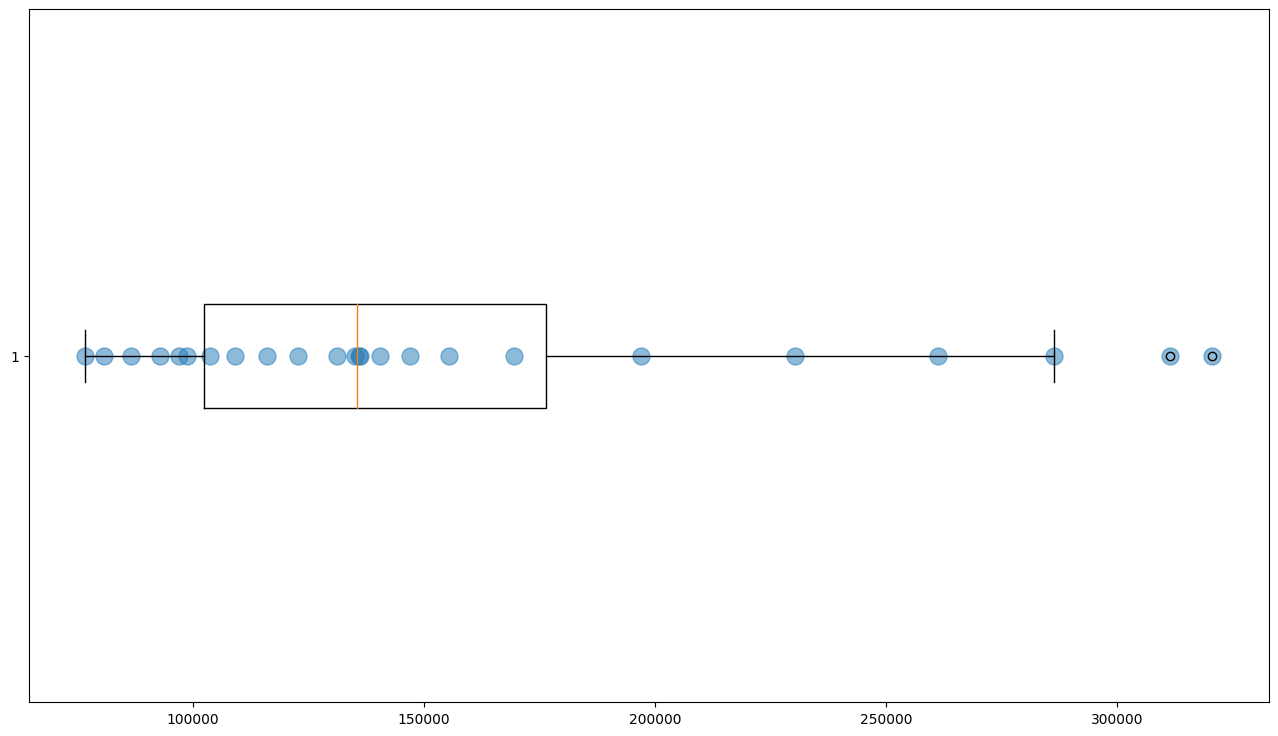

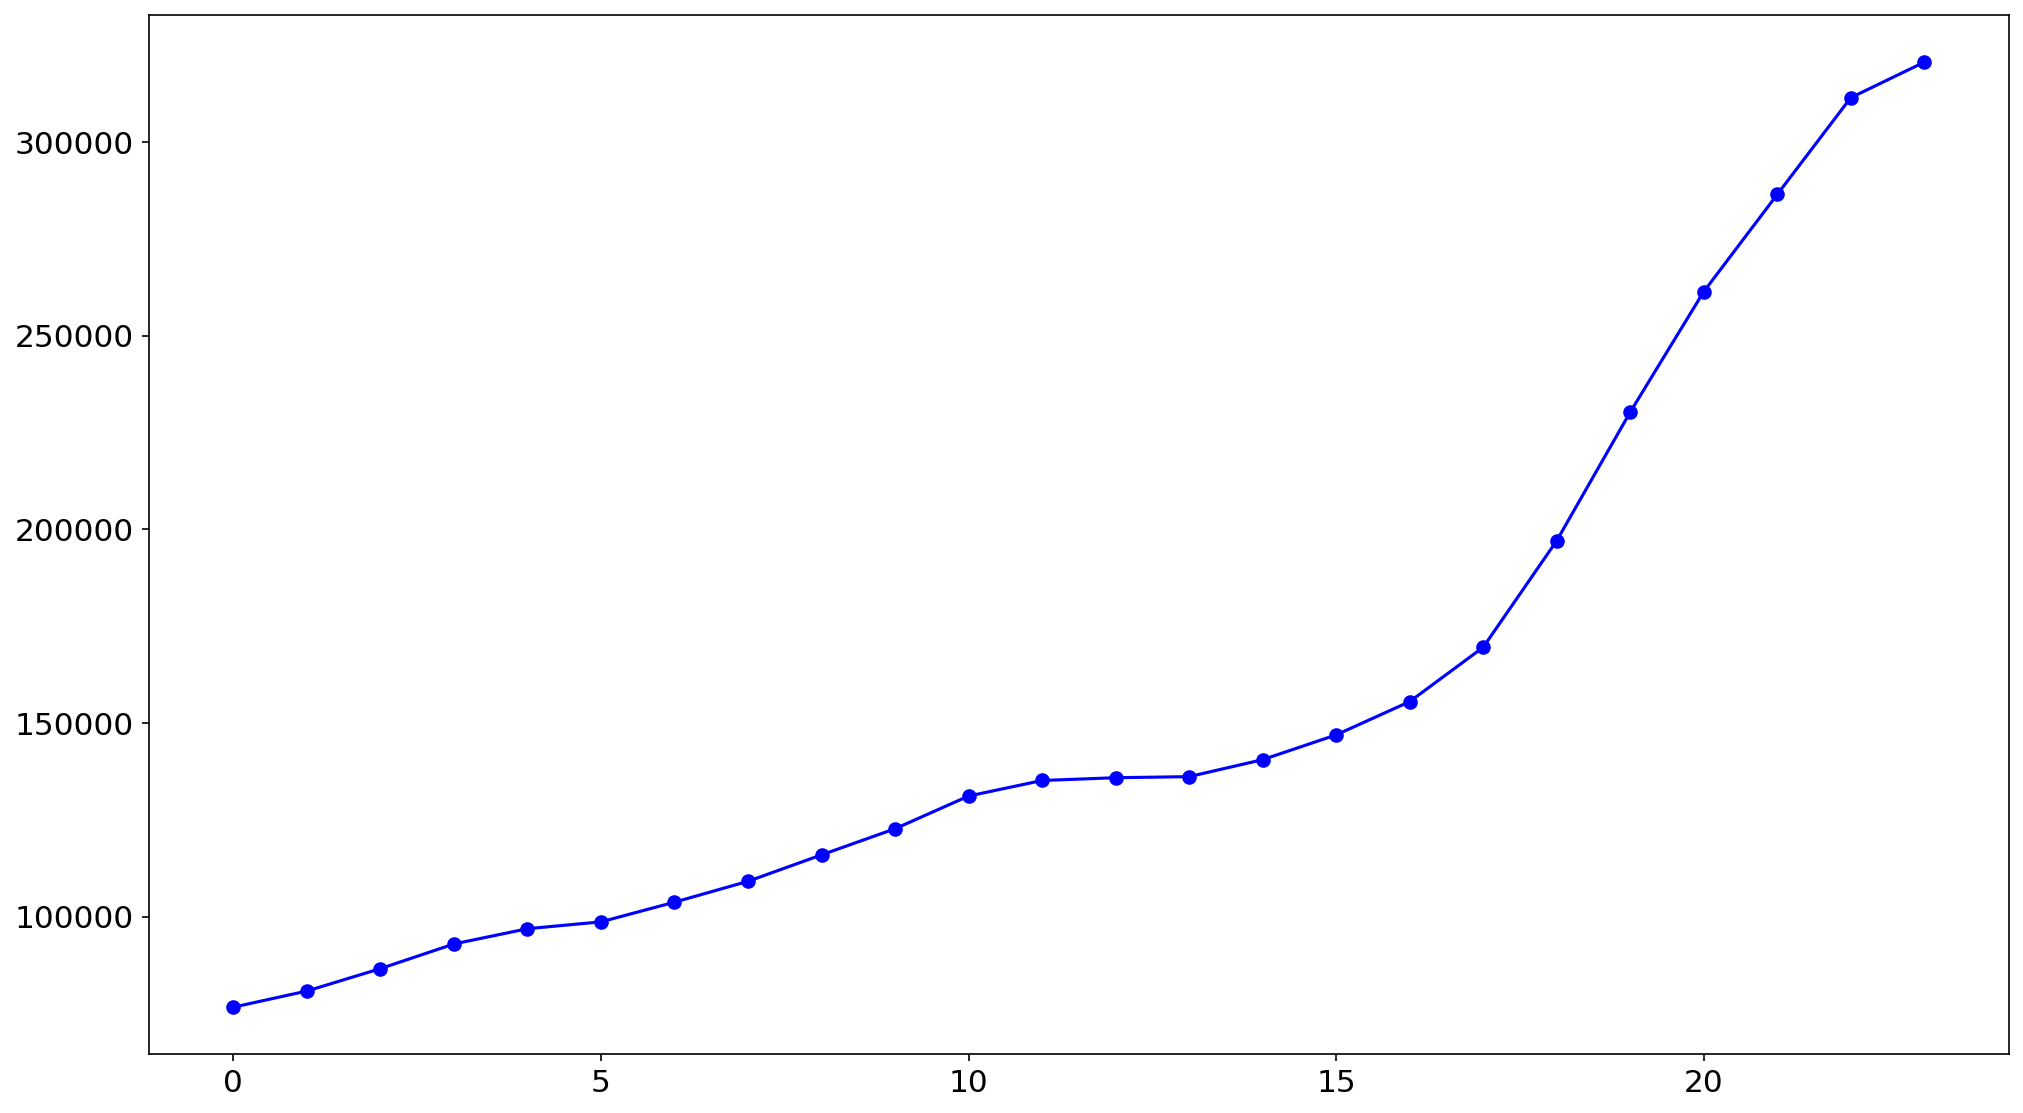

In [2]:
## 数据预处理
# 异常值检测
plt.figure(figsize=(16, 9))
# 绘制箱线图，水平放置
boxplot = plt.boxplot(df['能源消费总量(万吨标准煤)'], vert=False)
plt.scatter(df['能源消费总量(万吨标准煤)'], [1] * len(df['能源消费总量(万吨标准煤)']), alpha=0.5 , s=150)
plt.savefig(fname='能源消费总量(万吨标准煤)箱线图.png')

# 绘制序列图
plt.figure(figsize=(16, 9), dpi=150)
plt.plot(df['能源消费总量(万吨标准煤)'], linestyle='-', color='b', marker='o', markerfacecolor='b')
plt.xlabel('', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig(fname='能源消费总量(万吨标准煤)序列图.png')

#### 2.1.2 能源加工转换总效率异常值检测
通过绘制箱线图发现没有异常值

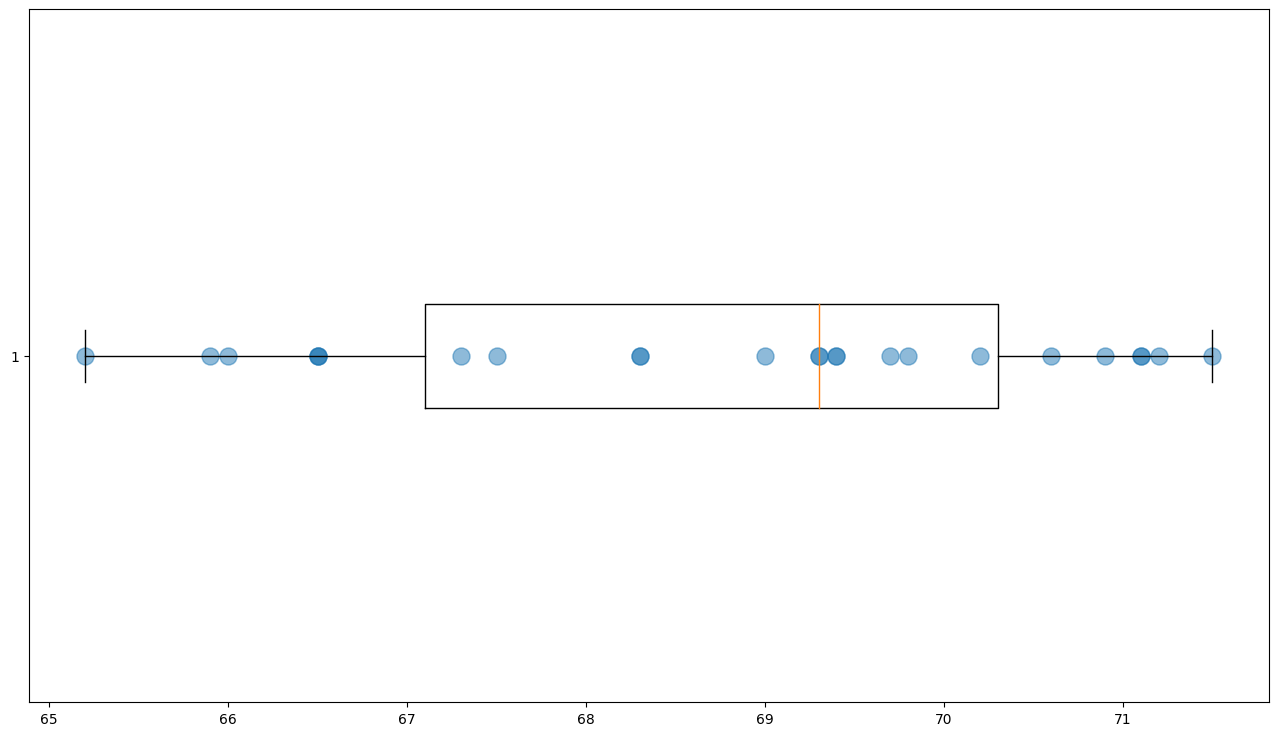

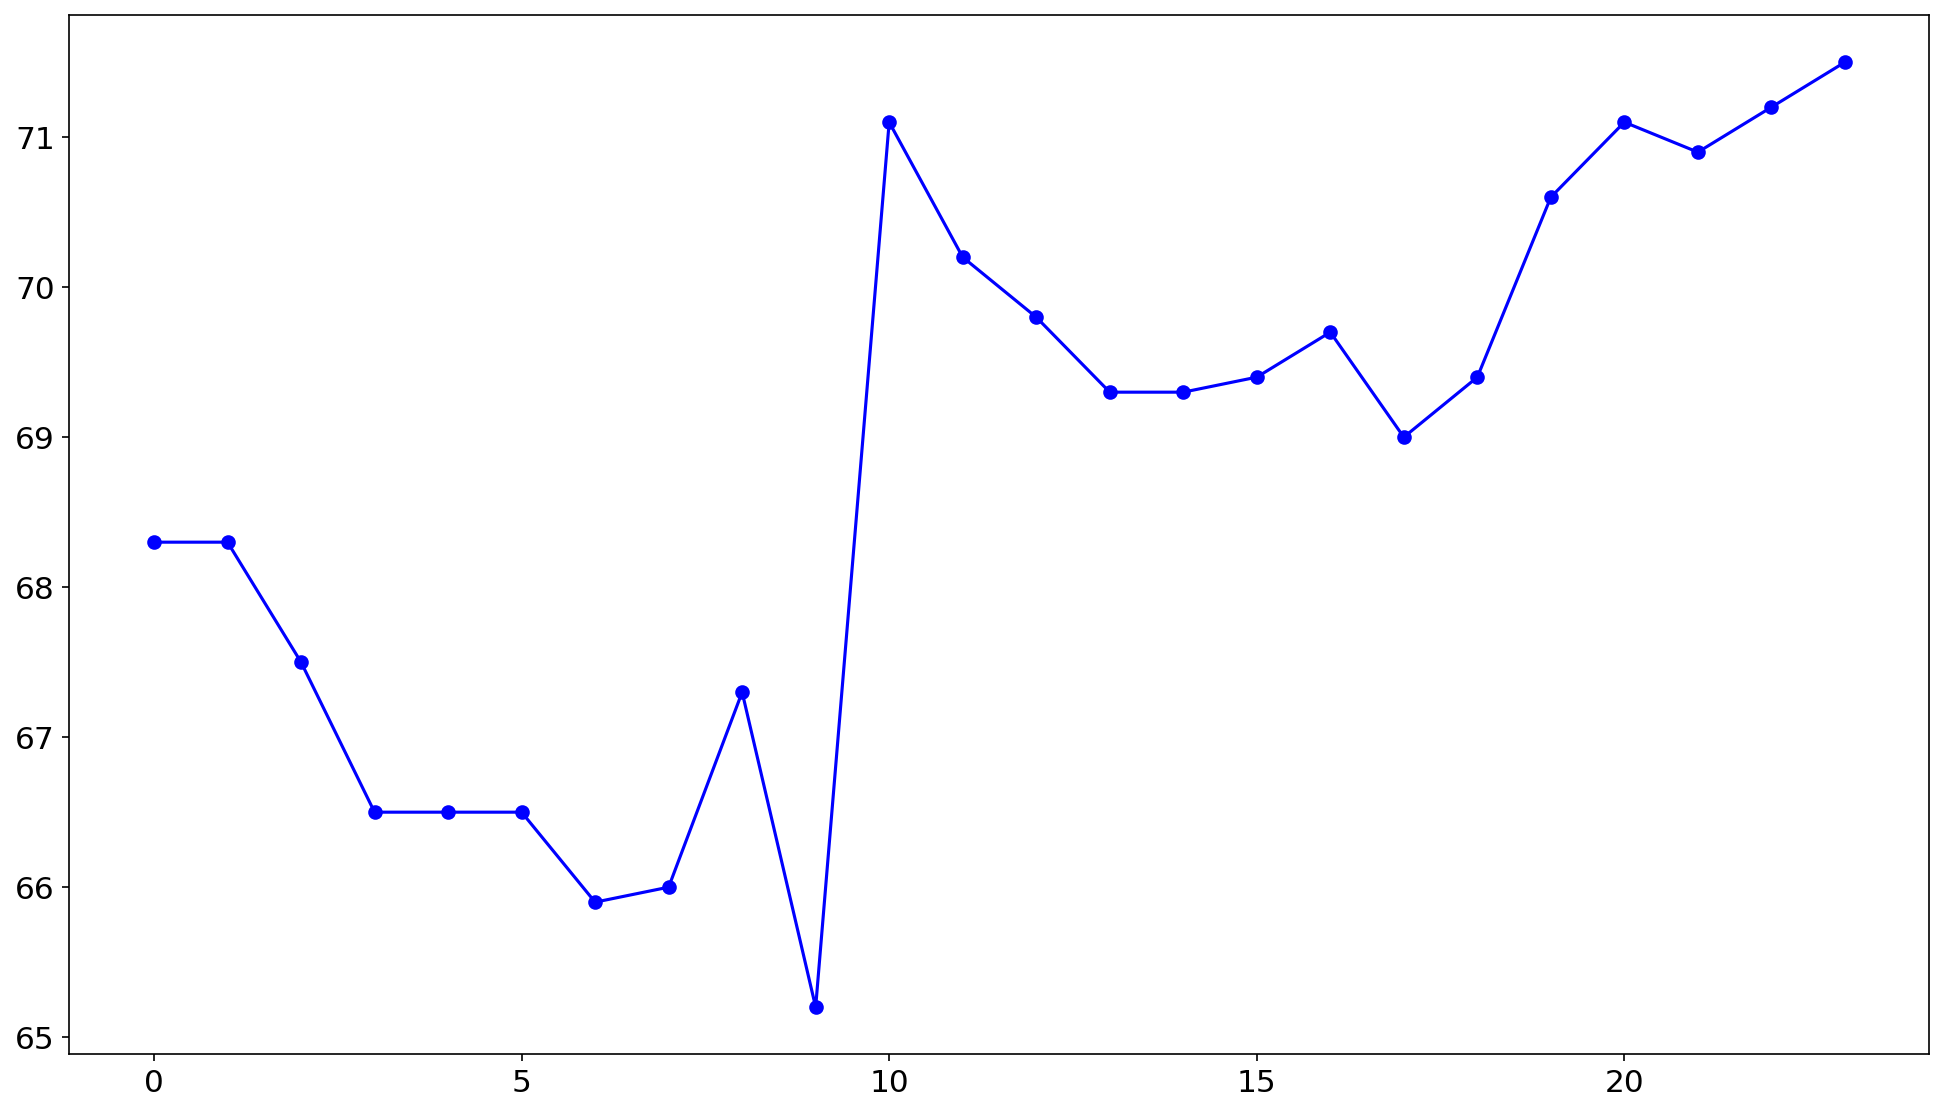

In [3]:
# 异常值检测
plt.figure(figsize=(16, 9))
# 绘制箱线图，水平放置
boxplot = plt.boxplot(df['能源加工转换总效率(%)'], vert=False)
plt.scatter(df['能源加工转换总效率(%)'], [1] * len(df['能源加工转换总效率(%)']), alpha=0.5 , s=150)
plt.savefig(fname='能源加工转换总效率(%)箱线图.png')

# 绘制序列图
plt.figure(figsize=(16, 9), dpi=150)
plt.plot(df['能源加工转换总效率(%)'], linestyle='-', color='b', marker='o', markerfacecolor='b')
plt.xlabel('', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig(fname='能源加工转换总效率(%)序列图.png')

#### 2.1.3 GDP异常值检测
通过绘制箱线图发现没有异常值

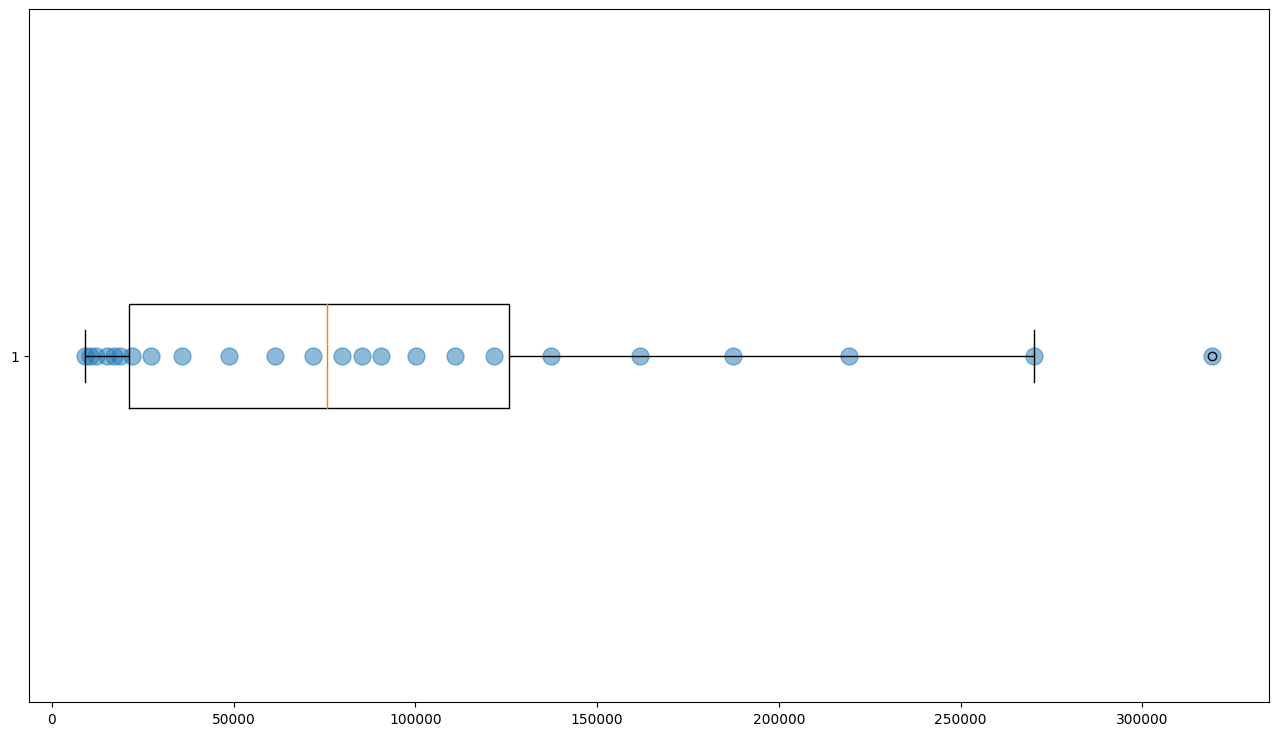

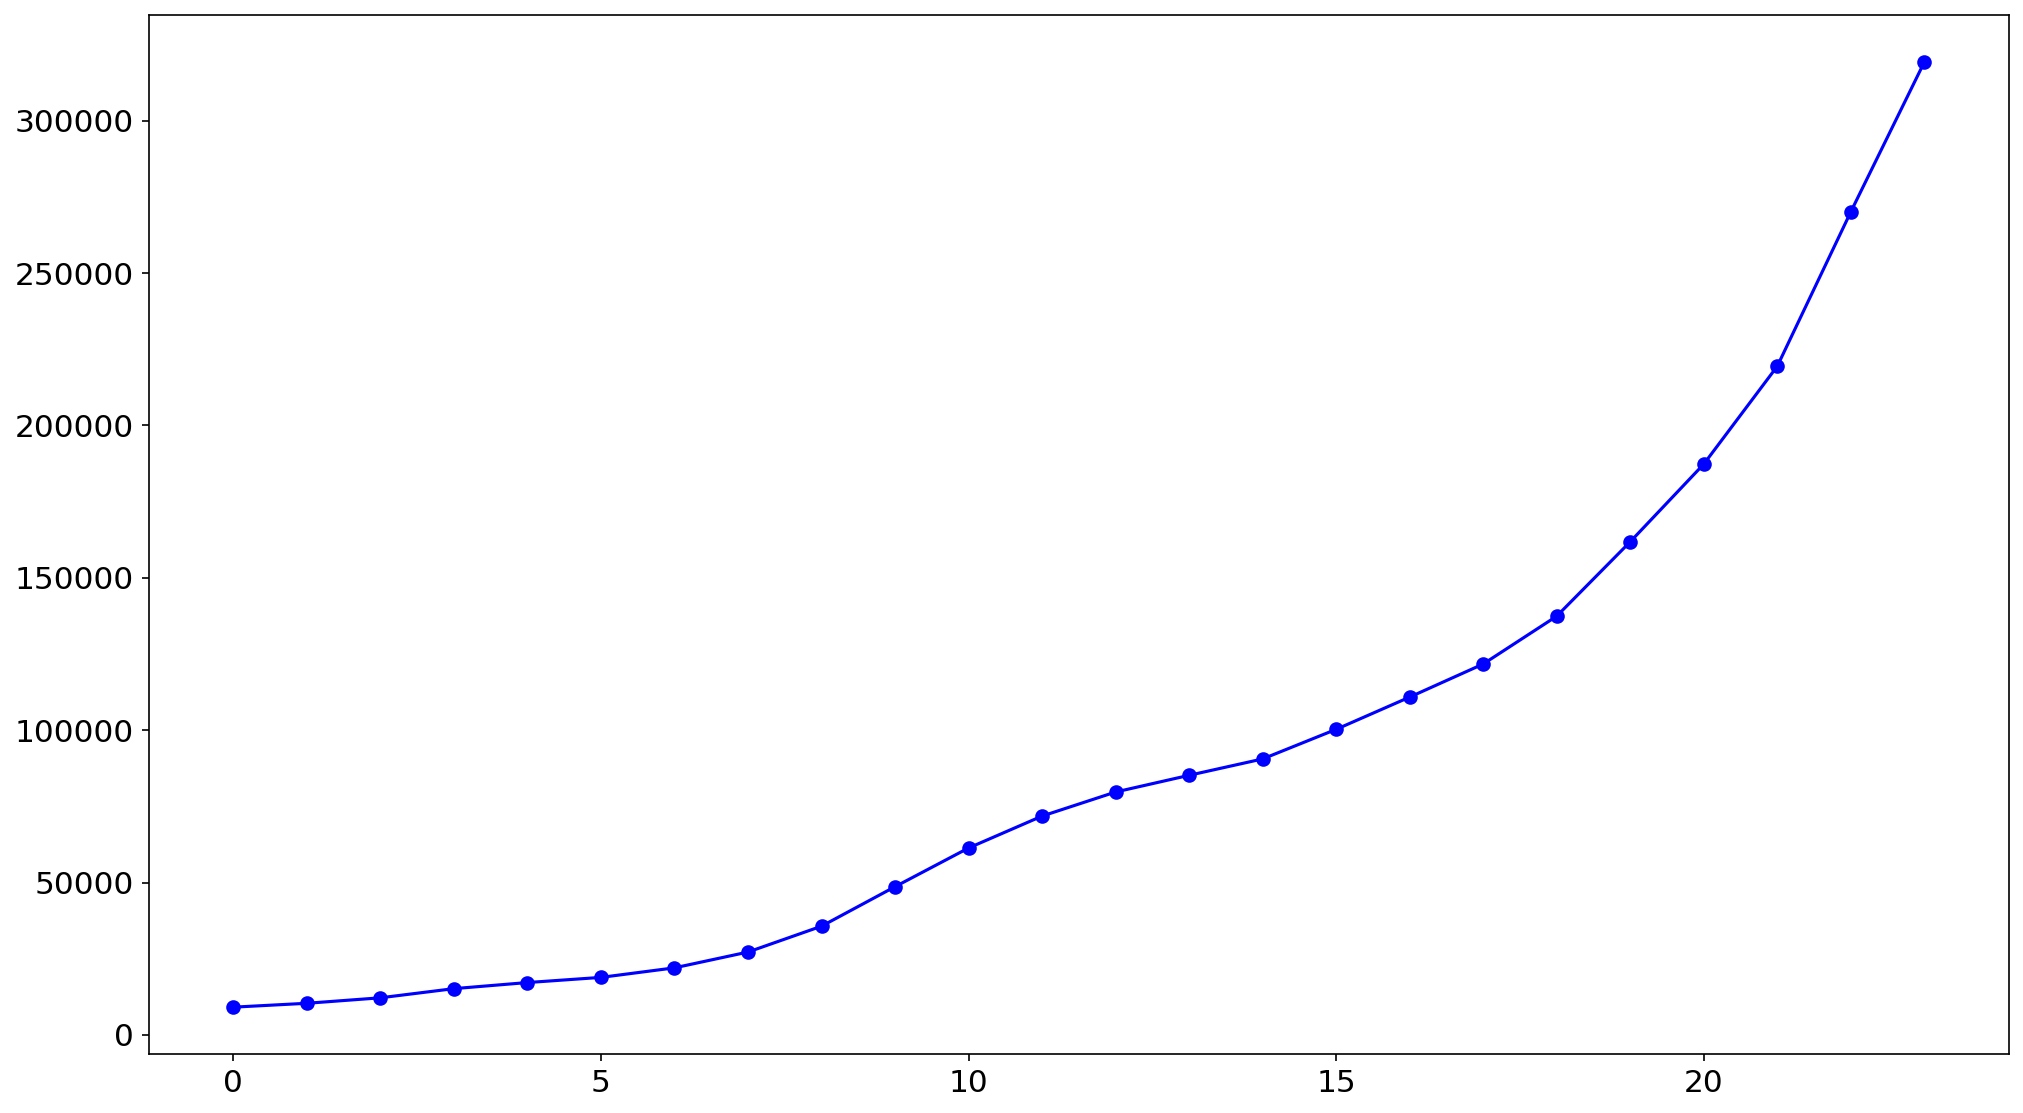

In [4]:
# 异常值检测
plt.figure(figsize=(16, 9))
# 绘制箱线图，水平放置
boxplot = plt.boxplot(df['GDP(亿元)'], vert=False)
plt.scatter(df['GDP(亿元)'], [1] * len(df['GDP(亿元)']), alpha=0.5 , s=150)
plt.savefig(fname='GDP(亿元)箱线图.png')

# 绘制序列图
plt.figure(figsize=(16, 9), dpi=150)
plt.plot(df['GDP(亿元)'], linestyle='-', color='b', marker='o', markerfacecolor='b')
plt.xlabel('', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig(fname='GDP(亿元)序列图.png')

通过检验发现没有异常值，如果存在则剔除，然后线性插值

### 2.2 缺失值检测 

In [5]:
# 缺失值检测
print("是否存在缺失值：", df.isnull().any().any())

是否存在缺失值： False


如果存在少量缺失值，可以线性插值；大量缺失值就换数据  
数据清洗完毕

## 三、数据差分与平稳性检验
### 3.1 能源消费总量二阶差分
通过探索，已经发现数据做一阶差分不平稳，所以直接做了二阶差分，在此不赘述

    能源消费总量(万吨标准煤)_二阶差分  能源加工转换总效率(%)_二阶差分  GDP(亿元)_二阶差分
2               1614.0               -0.8         521.1
3                583.0               -0.2        1207.4
4              -2428.0                1.0       -1006.5
5              -2168.0                0.0        -306.1
6               3311.0               -0.6        1439.5
7                307.0                0.7        2056.2
8               1436.0                1.2        3289.8
9                -79.0               -3.4        4485.6
10              1695.0                8.0        -261.9
11             -4423.0               -6.8       -2228.7
12             -3299.0                0.5       -2572.3
13              -442.0               -0.1       -2420.9
14              4110.0                0.5        -111.6
15              2010.0                0.1        4346.8
16              2188.0                0.2         867.3
17              5447.0               -1.0         271.3
18             13476.0                1.1       

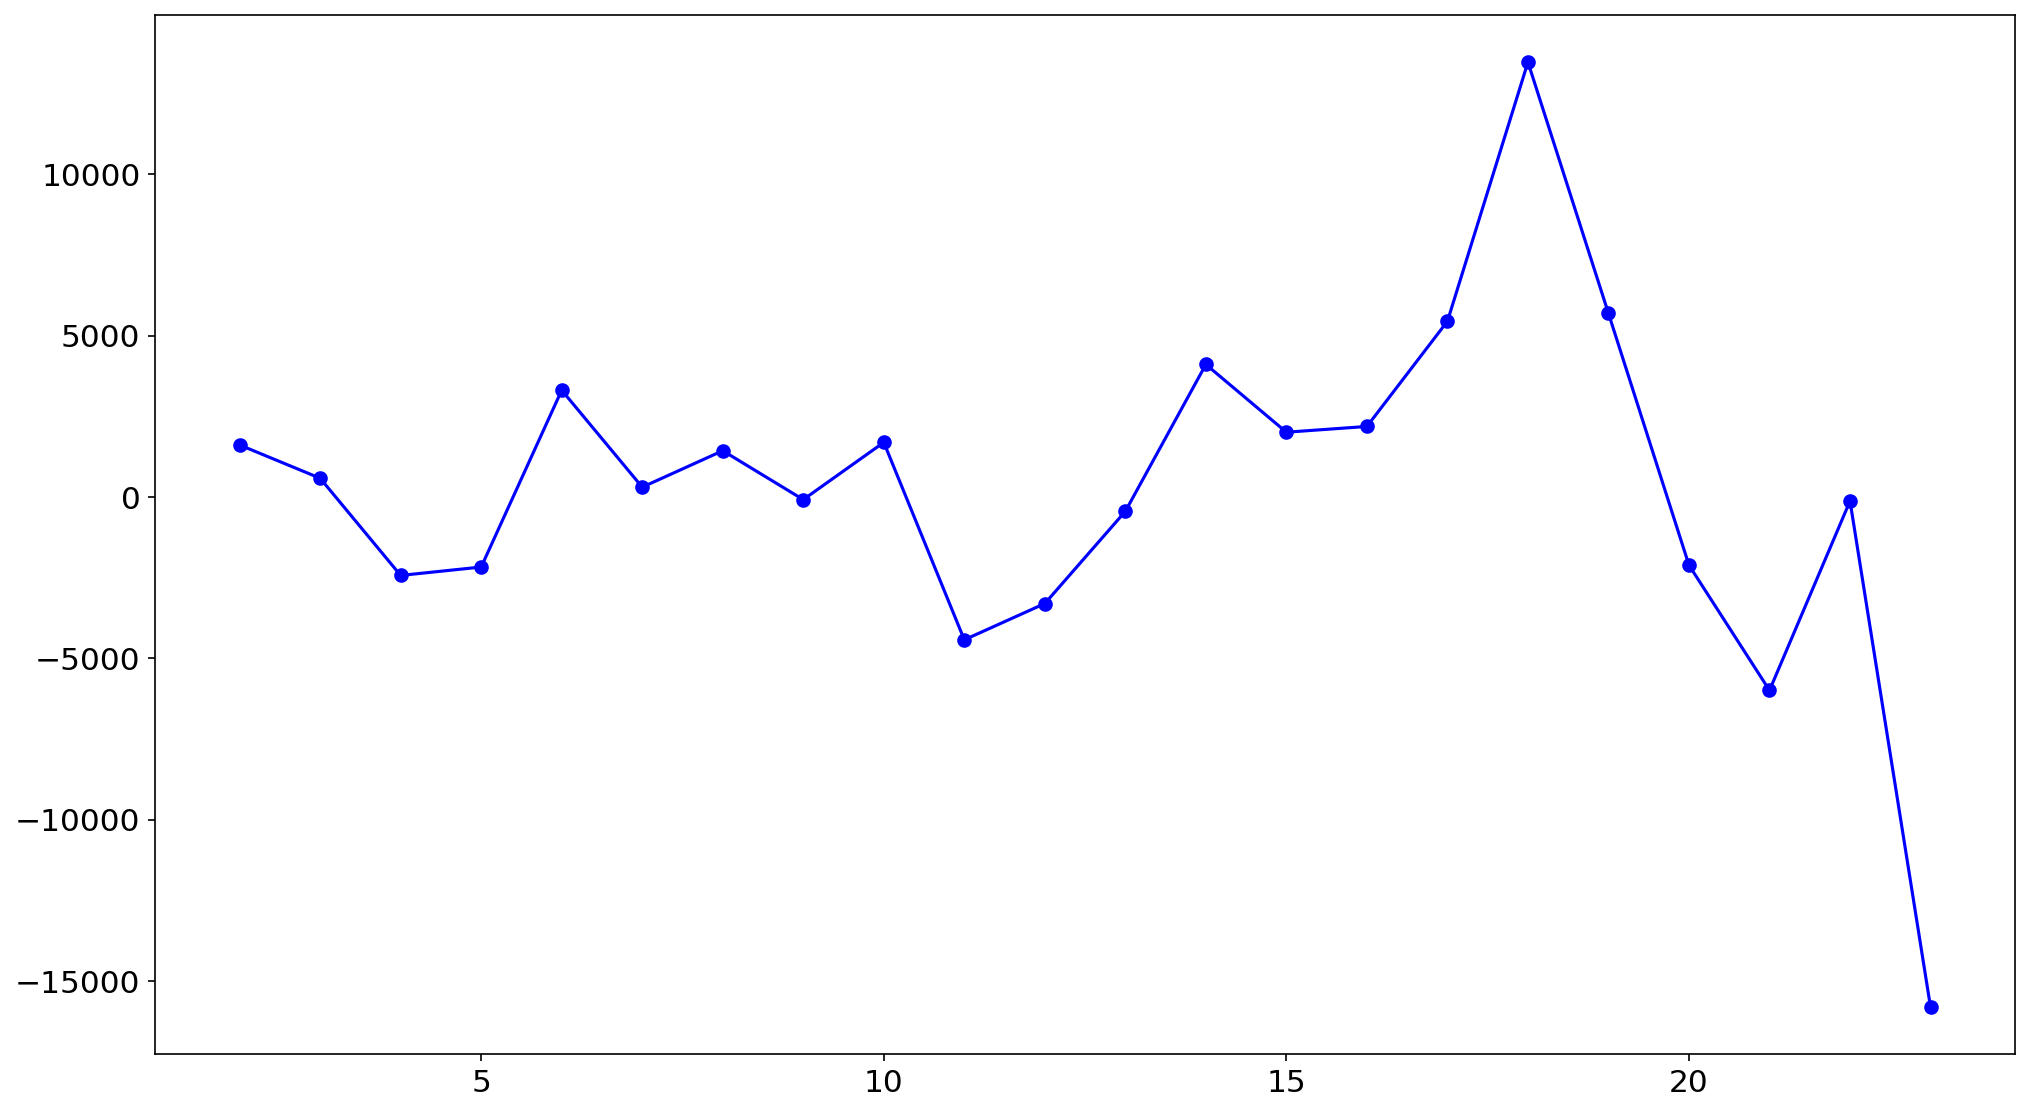

In [6]:
## 数据差分与平稳性检验
# 二阶差分
df_diff = df.copy()
df_diff['能源消费总量(万吨标准煤)_二阶差分'] = ((df['能源消费总量(万吨标准煤)'])).diff().diff()
df_diff['能源加工转换总效率(%)_二阶差分'] = ((df['能源加工转换总效率(%)'])).diff().diff()
df_diff['GDP(亿元)_二阶差分'] = ((df['GDP(亿元)'])).diff().diff()
df_diff = df_diff.iloc[2:]
columns_to_keep = ["能源消费总量(万吨标准煤)_二阶差分", "能源加工转换总效率(%)_二阶差分", "GDP(亿元)_二阶差分"]
df_diff = df_diff[columns_to_keep]
print(df_diff)

# 绘制二阶差分后的序列图
plt.figure(figsize=(16, 9), dpi=150)
plt.plot(df_diff['能源消费总量(万吨标准煤)_二阶差分'], linestyle='-', color='b', marker='o', markerfacecolor='b')
plt.xlabel('', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig(fname='能源消费总量(万吨标准煤)二阶差分后的的序列图.png')

### 3.2 能源消费总量差分后的平稳性检验
#### 3.2.1 ADF检验
原假设$$H0:序列非平稳$$
备择假设$$H1:序列平稳$$

In [7]:
# 对二阶差分后的数据做 ADF 检验
result_first_order = adfuller(df_diff['能源消费总量(万吨标准煤)_二阶差分'], autolag='AIC')
print(f'二阶差分后 ADF 检验统计量：{result_first_order[0]}')
print(f'p 值：{result_first_order[1]}')
print(f'临界值（1%）：{result_first_order[4]["1%"]}')
print(f'临界值（5%）：{result_first_order[4]["5%"]}')
print(f'临界值（10%）：{result_first_order[4]["10%"]}')

if result_first_order[1] < 0.05:
    print('能源消费总量二阶差分数据是平稳的。')
else:
    print('能源消费总量二阶差分数据不是平稳的。')

二阶差分后 ADF 检验统计量：-2.931397856624602
p 值：0.041816790304372256
临界值（1%）：-3.9240193847656246
临界值（5%）：-3.0684982031250003
临界值（10%）：-2.67389265625
能源消费总量二阶差分数据是平稳的。


#### 3.2.2 PP检验
原假设$$H0:时间序列包含单位根$$
备择假设$$H1:时间序列为弱平稳$$

In [8]:
# 对二阶差分后的数据做 PP 检验
pp = PhillipsPerron(df_diff['能源消费总量(万吨标准煤)_二阶差分'])
print(pp.summary().as_text())

p_value = pp.pvalue

if p_value < 0.05:
    print("拒绝原假设，PP检验下能源消费总量二阶差分后的数据是平稳数据。")
else:
    print("不拒绝原假设，PP检验下能源消费总量二阶差分后的数据是非平稳数据。")

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -0.961
P-value                         0.767
Lags                                9
-------------------------------------

Trend: Constant
Critical Values: -3.79 (1%), -3.01 (5%), -2.65 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
不拒绝原假设，PP检验下能源消费总量二阶差分后的数据是非平稳数据。


### 3.3 能源加工转换总效率二阶差分
通过探索，已经发现数据做一阶差分不平稳，所以直接做了二阶差分，在此不赘述

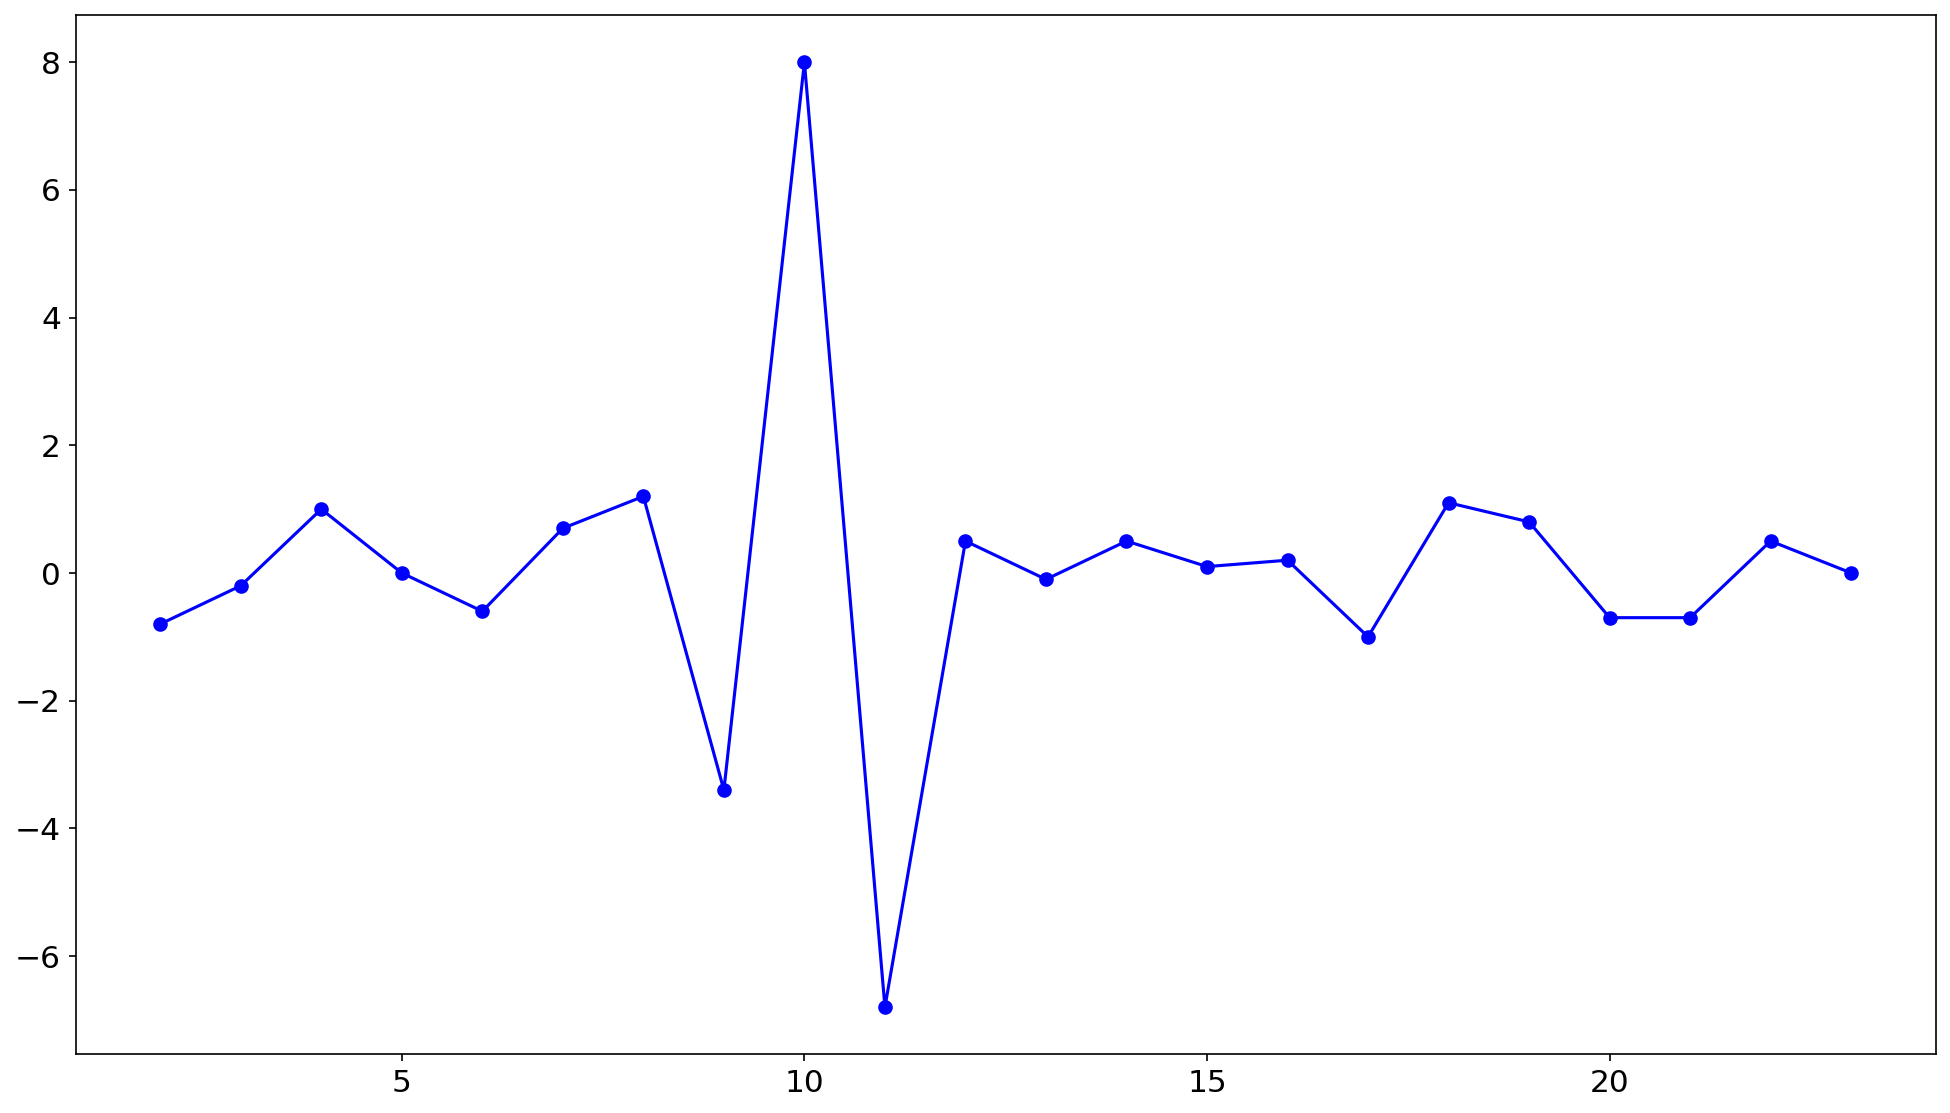

In [9]:
# 绘制二阶差分后的序列图
plt.figure(figsize=(16, 9), dpi=150)
plt.plot(df_diff['能源加工转换总效率(%)_二阶差分'] , linestyle='-', color='b', marker='o', markerfacecolor='b')
plt.xlabel('', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig(fname='能源加工转换总效率二阶差分后的的序列图.png')

### 3.4 能源加工转换总效率差分后的平稳性检验
#### 3.4.1 ADF检验
原假设$$H0:序列非平稳$$
备择假设$$H1:序列平稳$$

In [10]:
# 对二阶差分后的数据做 ADF 检验
result_first_order = adfuller(df_diff['能源加工转换总效率(%)_二阶差分'] , autolag='AIC')
print(f'二阶差分后 ADF 检验统计量：{result_first_order[0]}')
print(f'p 值：{result_first_order[1]}')
print(f'临界值（1%）：{result_first_order[4]["1%"]}')
print(f'临界值（5%）：{result_first_order[4]["5%"]}')
print(f'临界值（10%）：{result_first_order[4]["10%"]}')

if result_first_order[1] < 0.05:
    print('能源加工转换总效率二阶差分数据是平稳的。')
else:
    print('能源加工转换总效率二阶差分数据不是平稳的。')

二阶差分后 ADF 检验统计量：-0.30302082182360424
p 值：0.9250754024517341
临界值（1%）：-4.137829282407408
临界值（5%）：-3.1549724074074077
临界值（10%）：-2.7144769444444443
能源加工转换总效率二阶差分数据不是平稳的。


#### 3.4.2 PP检验
原假设$$H0:时间序列包含单位根$$
备择假设$$H1:时间序列为弱平稳$$

In [11]:
# 对二阶差分后的数据做 PP 检验
pp = PhillipsPerron(df_diff['能源加工转换总效率(%)_二阶差分'] )
print(pp.summary().as_text())

p_value = pp.pvalue

if p_value < 0.05:
    print("拒绝原假设，PP检验下能源加工转换总效率二阶差分后的数据是平稳数据。")
else:
    print("不拒绝原假设，PP检验下能源加工转换总效率二阶差分后的数据是非平稳数据。")

     Phillips-Perron Test (Z-tau)    
Test Statistic                -25.290
P-value                         0.000
Lags                                9
-------------------------------------

Trend: Constant
Critical Values: -3.79 (1%), -3.01 (5%), -2.65 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
拒绝原假设，PP检验下能源加工转换总效率二阶差分后的数据是平稳数据。


### 3.5 GDP二阶差分
通过探索，已经发现数据做一阶差分不平稳，所以直接做了二阶差分，在此不赘述

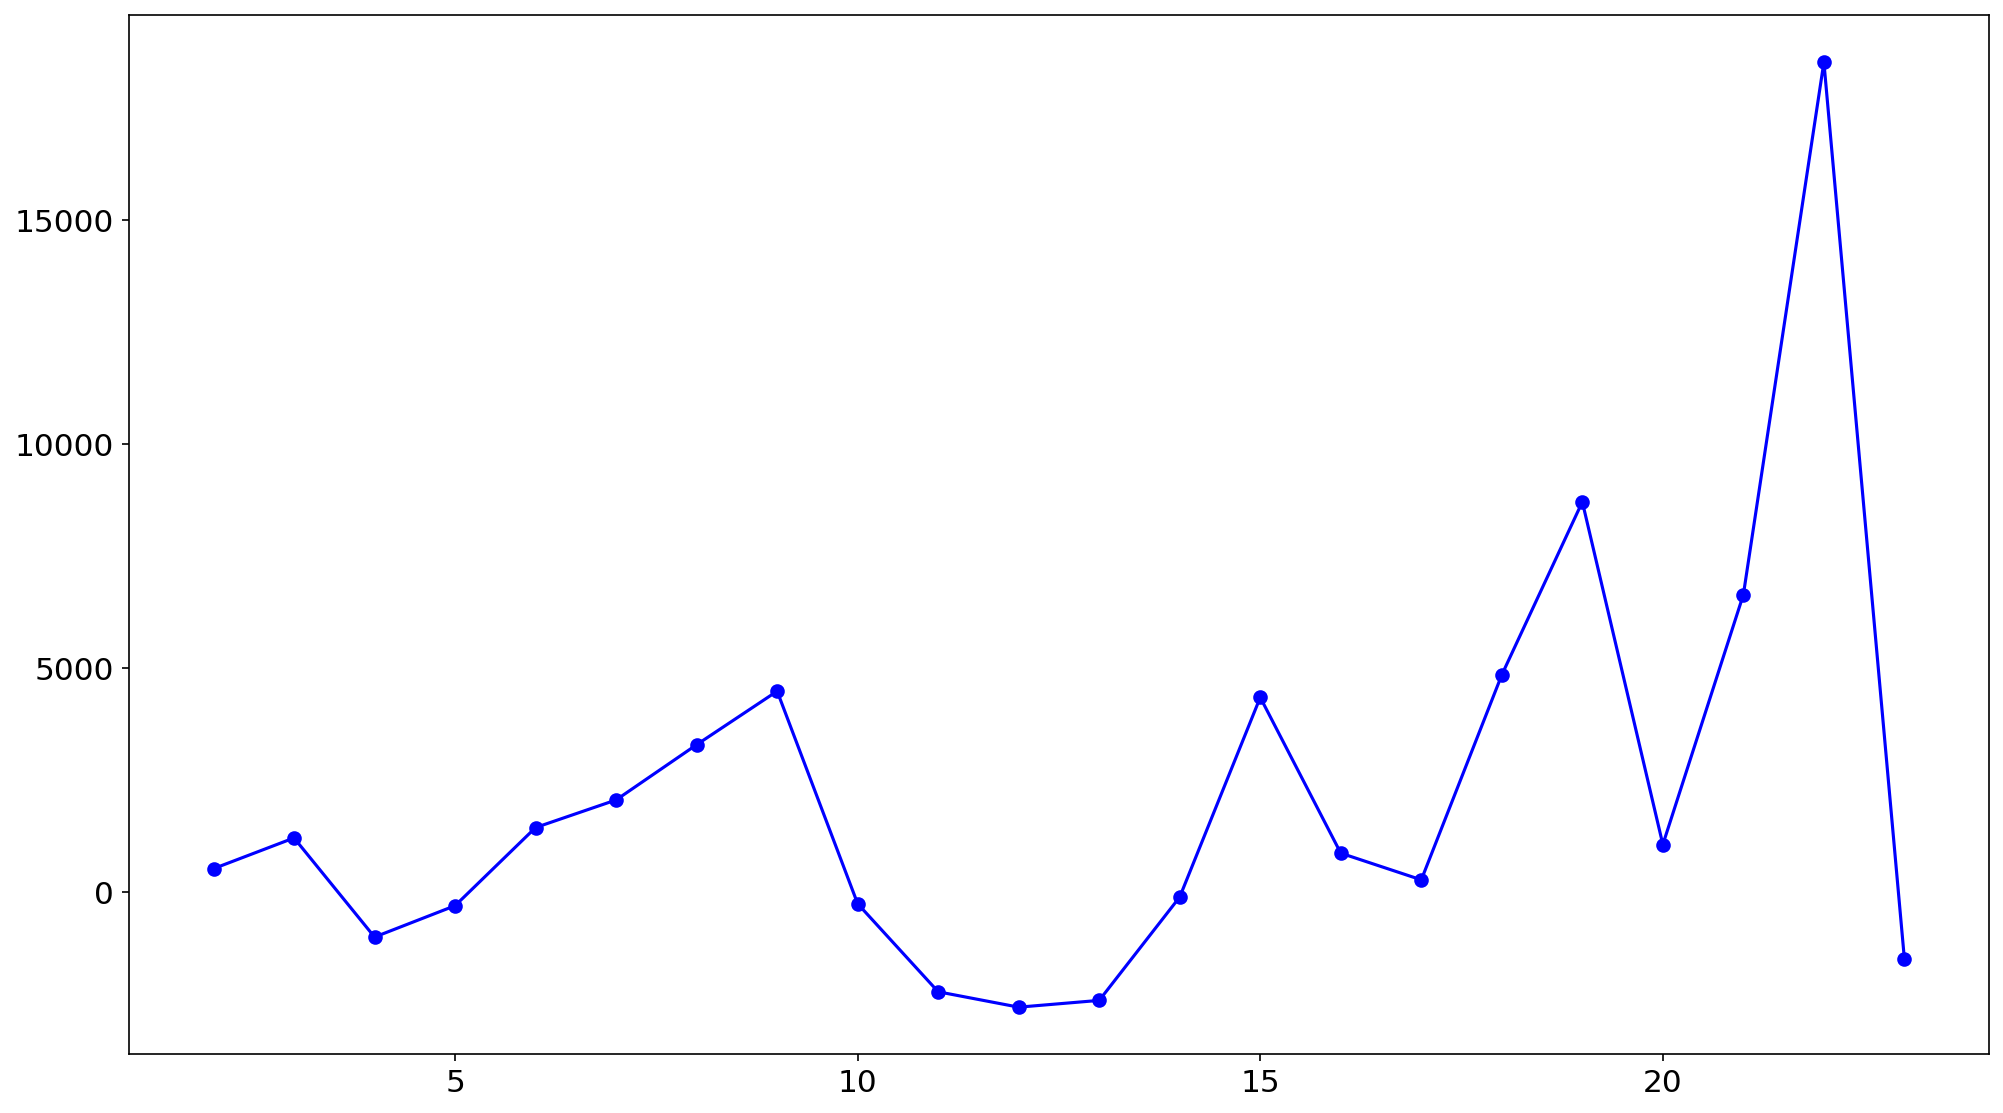

In [12]:
# 绘制二阶差分后的序列图
plt.figure(figsize=(16, 9), dpi=150)
plt.plot(df_diff['GDP(亿元)_二阶差分'], linestyle='-', color='b', marker='o', markerfacecolor='b')
plt.xlabel('', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig(fname='GDP二阶差分后的的序列图.png')

### 3.6 能源加工转换总效率差分后的平稳性检验
#### 3.6.1 ADF检验
原假设$$H0:序列非平稳$$
备择假设$$H1:序列平稳$$

In [13]:
# 对二阶差分后的数据做 ADF 检验
result_first_order = adfuller(df_diff['GDP(亿元)_二阶差分'], autolag='AIC')
print(f'二阶差分后 ADF 检验统计量：{result_first_order[0]}')
print(f'p 值：{result_first_order[1]}')
print(f'临界值（1%）：{result_first_order[4]["1%"]}')
print(f'临界值（5%）：{result_first_order[4]["5%"]}')
print(f'临界值（10%）：{result_first_order[4]["10%"]}')

if result_first_order[1] < 0.05:
    print('GDP二阶差分数据是平稳的。')
else:
    print('GDP二阶差分数据不是平稳的。')

二阶差分后 ADF 检验统计量：-3.8397604219350296
p 值：0.0025257299152838066
临界值（1%）：-4.068853732362312
临界值（5%）：-3.1271488757396453
临界值（10%）：-2.7017297633136095
GDP二阶差分数据是平稳的。


#### 3.4.2 PP检验
原假设$$H0:时间序列包含单位根$$
备择假设$$H1:时间序列为弱平稳$$

In [14]:
# 对二阶差分后的数据做 PP 检验
pp = PhillipsPerron(df_diff['GDP(亿元)_二阶差分'])
print(pp.summary().as_text())

p_value = pp.pvalue

if p_value < 0.05:
    print("拒绝原假设，PP检验下GDP二阶差分后的数据是平稳数据。")
else:
    print("不拒绝原假设，PP检验下GDP二阶差分后的数据是非平稳数据。")

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -3.582
P-value                         0.006
Lags                                9
-------------------------------------

Trend: Constant
Critical Values: -3.79 (1%), -3.01 (5%), -2.65 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
拒绝原假设，PP检验下GDP二阶差分后的数据是平稳数据。


## 四、纯随机检验
已经判断差分后的序列为平稳性数据，进一步判断是否为白噪声数据，采用LB检验。  
原假设：$$H_0: \rho_1=\rho_2=\cdots=\rho_m=0, \forall m \geq 1$$  
备择假设：$$H_1: \rho_k \neq 0,  \forall m \geq 1, k \leq m$$  
LB统计量：$$LB=n(n+2) \sum_{k=1}^m\left(\frac{\hat{\rho}_k^2}{n-k}\right) \sim \chi^2(m)$$
从结果上来看，p值小于0.05，拒绝原假设，认为这一组序列为非白噪声序列，不具有纯随机性。

In [15]:
print('能源消费总量(万吨标准煤)_二阶差分的白噪声检验：')
## 纯随机检验
LB = acorr_ljungbox(df_diff['能源消费总量(万吨标准煤)_二阶差分'] , lags=range(1, 10), boxpierce=True, return_df=True)
print(LB)

print('GDP(亿元)_二阶差分的白噪声检验：')
LB = acorr_ljungbox(df_diff['GDP(亿元)_二阶差分'] , lags=range(1, 10), boxpierce=True, return_df=True)
print(LB)

print('能源加工转换总效率(%)_二阶差分的白噪声检验：')
LB = acorr_ljungbox(df_diff['能源加工转换总效率(%)_二阶差分'] , lags=range(1, 10), boxpierce=True, return_df=True)
print(LB)

能源消费总量(万吨标准煤)_二阶差分的白噪声检验：
     lb_stat  lb_pvalue   bp_stat  bp_pvalue
1   2.108416   0.146491  1.844864   0.174382
2   2.595415   0.273157  2.250697   0.324539
3   2.721982   0.436505  2.350895   0.502841
4   3.202593   0.524512  2.711354   0.607229
5   8.771477   0.118534  6.655980   0.247508
6  11.390647   0.077028  8.402093   0.210100
7  12.447002   0.086784  9.062315   0.248213
8  12.447054   0.132344  9.062346   0.337064
9  12.533417   0.184880  9.109125   0.427263
GDP(亿元)_二阶差分的白噪声检验：
    lb_stat  lb_pvalue   bp_stat  bp_pvalue
1  0.805696   0.369396  0.704984   0.401114
2  0.807185   0.667916  0.706225   0.702498
3  2.954460   0.398700  2.406151   0.492491
4  2.968648   0.563086  2.416792   0.659595
5  3.798057   0.578842  3.004290   0.699324
6  3.820923   0.700895  3.019534   0.806391
7  3.918901   0.789070  3.080770   0.877431
8  4.673037   0.791882  3.520683   0.897579
9  5.451901   0.793271  3.942567   0.915152
能源加工转换总效率(%)_二阶差分的白噪声检验：
     lb_stat  lb_pvalue    bp_stat  bp_

## 五、相关性检验
先检验GDP和能源消费总量和能源加工转化率总效率的相关性，如果确实存在某种相关性，便进行下一步建模  
为了防止出现自相关的情况，对能源消费总量和能源加工转换率总销量做相关性检验

In [16]:
## 相关性检验
# 先检验GDP和能源消费总量和能源加工转化率总效率的相关性，如果确实存在某种相关性，便进行下一步建模
# 为了防止出现自相关的情况，对能源消费总量和能源加工转换率总销量做相关性检验
# Pearson相关系数检验
print("Pearson相关系数:")
print(df_diff.corr(method='pearson'))

# Spearman相关系数检验
print("Spearman相关系数:")
print(df_diff.corr(method='spearman'))

Pearson相关系数:
                    能源消费总量(万吨标准煤)_二阶差分  能源加工转换总效率(%)_二阶差分  GDP(亿元)_二阶差分
能源消费总量(万吨标准煤)_二阶差分            1.000000           0.213289      0.240059
能源加工转换总效率(%)_二阶差分             0.213289           1.000000      0.062771
GDP(亿元)_二阶差分                  0.240059           0.062771      1.000000
Spearman相关系数:
                    能源消费总量(万吨标准煤)_二阶差分  能源加工转换总效率(%)_二阶差分  GDP(亿元)_二阶差分
能源消费总量(万吨标准煤)_二阶差分            1.000000           0.288217      0.409373
能源加工转换总效率(%)_二阶差分             0.288217           1.000000      0.117547
GDP(亿元)_二阶差分                  0.409373           0.117547      1.000000


## 六、格兰杰因果检验

In [17]:
## 格兰杰因果检验
# 原假设：能源加工转换总效率式GDP、能源消费总量的原因
energy_efficiency = df_diff['能源加工转换总效率(%)_二阶差分']
gdp = df_diff['GDP(亿元)_二阶差分']
energy_consumption = df_diff['能源消费总量(万吨标准煤)_二阶差分']

# 设定最大滞后阶数
maxlag = 2

# 检验能源加工转换总效率是否是GDP的格兰杰原因
model_gdp = sm.tsa.stattools.grangercausalitytests(
    pd.concat([energy_efficiency, gdp], axis = 1).dropna(),
    maxlag = maxlag
)

# 检验能源加工转换总效率是否是能源消费总量的格兰杰原因
model_energy_consumption = sm.tsa.stattools.grangercausalitytests(
    pd.concat([energy_efficiency, energy_consumption], axis = 1).dropna(),
    maxlag = maxlag
)

# 输出检验GDP的结果并判断
print("能源加工转换总效率是否是GDP的格兰杰原因检验结果：")
significance_level = 0.05
for lag in model_gdp:
    print(f"滞后阶数 {lag}:")
    print(f"检验统计量: {model_gdp[lag][0]['ssr_ftest'][0]}")
    print(f"p值: {model_gdp[lag][0]['ssr_ftest'][1]}")
    if model_gdp[lag][0]['ssr_ftest'][1] < significance_level:
        print("能源加工转换总效率是GDP的格兰杰原因")
    else:
        print("没有足够证据表明能源加工转换总效率是GDP的格兰杰原因")

# 输出检验能源消费总量的结果并判断
print("能源加工转换总效率是否是能源消费总量的格兰杰原因检验结果：")
for lag in model_energy_consumption:
    print(f"滞后阶数 {lag}:")
    print(f"检验统计量: {model_energy_consumption[lag][0]['ssr_ftest'][0]}")
    print(f"p值: {model_energy_consumption[lag][0]['ssr_ftest'][1]}")
    if model_energy_consumption[lag][0]['ssr_ftest'][1] < significance_level:
        print("能源加工转换总效率是能源消费总量的格兰杰原因")
    else:
        print("没有足够证据表明能源加工转换总效率是能源消费总量的格兰杰原因")


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8845  , p=0.3594  , df_denom=18, df_num=1
ssr based chi2 test:   chi2=1.0319  , p=0.3097  , df=1
likelihood ratio test: chi2=1.0073  , p=0.3155  , df=1
parameter F test:         F=0.8845  , p=0.3594  , df_denom=18, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5382  , p=0.5947  , df_denom=15, df_num=2
ssr based chi2 test:   chi2=1.4351  , p=0.4880  , df=2
likelihood ratio test: chi2=1.3859  , p=0.5001  , df=2
parameter F test:         F=0.5382  , p=0.5947  , df_denom=15, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0901  , p=0.3103  , df_denom=18, df_num=1
ssr based chi2 test:   chi2=1.2717  , p=0.2594  , df=1
likelihood ratio test: chi2=1.2347  , p=0.2665  , df=1
parameter F test:         F=1.0901  , p=0.3103  , df_denom=18, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.0563  , p=0.3722  , df_d

## 七、VARMAX模型
设置外生变量为能源加工转换总效率，内生变量为能源消费总量和GDP

In [18]:
## VARMAX模型拟合
# 提取内生变量数据
endog_data = df_diff[['能源消费总量(万吨标准煤)_二阶差分', 'GDP(亿元)_二阶差分']].values

# 提取外生变量数据
exog_data = df_diff['能源加工转换总效率(%)_二阶差分'].values.reshape(-1, 1)

# 创建VARMAX模型实例
model = VARMAX(endog=endog_data, exog=exog_data, order=(1, 1))

# 拟合模型
results = model.fit(disp=False)
print(results.summary())

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


                           Statespace Model Results                           
Dep. Variable:           ['y1', 'y2']   No. Observations:                   22
Model:                    VARMAX(1,1)   Log Likelihood                -420.950
                          + intercept   AIC                            871.899
Date:                Wed, 27 Nov 2024   BIC                            888.265
Time:                        11:16:21   HQIC                           875.755
Sample:                             0                                         
                                 - 22                                         
Covariance Type:                  opg                                         
Ljung-Box (L1) (Q):             0.79, 0.12   Jarque-Bera (JB):          1.63, 11.20
Prob(Q):                        0.37, 0.72   Prob(JB):                   0.44, 0.00
Heteroskedasticity (H):        2.29, 35.64   Skew:                       0.61, 1.53
Prob(H) (two-sided):            0.30,

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


因此，模型$VARMAX(1,1)$
\begin{align*}
\begin{pmatrix}
y_{1t} \\
y_{2t}
\end{pmatrix}&=\begin{pmatrix}
c_1 \\
c_2
\end{pmatrix}+\begin{pmatrix}
a_{11}^{(1)} & a_{12}^{(1)} \\
a_{21}^{(1)} & a_{22}^{(1)}
\end{pmatrix}\begin{pmatrix}
y_{1,t - 1} \\
y_{2,t - 1}
\end{pmatrix}+\begin{pmatrix}
b_{11}^{(1)} & b_{12}^{(1)} \\
b_{21}^{(1)} & b_{22}^{(1)}
\end{pmatrix}\begin{pmatrix}
e_{1,t - 1} \\
e_{2,t - 1}
\end{pmatrix}+\begin{pmatrix}
d_{1} \\
d_{2}
\end{pmatrix}\begin{pmatrix}
x_{t}
\end{pmatrix}+\begin{pmatrix}
e_{1t} \\
e_{2t}
\end{pmatrix}\\
\end{align*}
具体形式是  
\begin{align*}
\begin{pmatrix}
y_{1t} \\
y_{2t}
\end{pmatrix}&=\begin{pmatrix}
1665.2943 \\
1794.2028
\end{pmatrix}+\begin{pmatrix}
0.9902 & -1.7488 \\
0.6458 & -0.9267
\end{pmatrix}\begin{pmatrix}
y_{1,t - 1} \\
y_{2,t - 1}
\end{pmatrix}+\begin{pmatrix}
0.2386 & 1.3317 \\
-0.2592 & 1.3538
\end{pmatrix}\begin{pmatrix}
e_{1,t - 1} \\
e_{2,t - 1}
\end{pmatrix}+\begin{pmatrix}
243.7037 \\
70.0247
\end{pmatrix}\begin{pmatrix}
x_{t}
\end{pmatrix}+\begin{pmatrix}
e_{1t} \\
e_{2t}
\end{pmatrix}\\
\end{align*}

## 八、诊断检验
### 8.1 残差的自相关检验
#### 8.1.1 DW检验
原假设$$ H0：P = 0（残差项不存在一阶序列相关）$$
备择假设$$  H1：P ≠ 0（残差项存在一阶序列相关）$$
检验统计量：$$DW=\sum_{t = 2}^{n}\frac{(e_{t}-e_{t - 1})^{2}}{\sum_{t = 2}^{n}e_{t}^{2}}$$
判断$$DW < d_l：拒绝H0，存在正相关性$$
$$d_l < DW < d_u：无法做出确切判断$$
$$d_u < DW < 4 - d_u：接受H0，不存在自相关性$$
$$4 - d_u < DW < 4 - d_l：无法做出确切判断$$
$$DW > 4 - d_l：拒绝H0，存在负相关性$$
其中$d_l$为DW检验统计量的下临界值，$d_u$为DW检验统计量的上临界值。

In [19]:
## 残差的自相关检验
EC_residuals = results.resid[:, 0]
GDP_residuals = results.resid[:, 1]
# DW检验
dw_stat = durbin_watson(EC_residuals)
print("DW统计量:", dw_stat)
if dw_stat < 1:
    print("DW检验下可能存在正自相关")
elif dw_stat > 3:
    print("DW检验下可能存在负自相关")
else:
    print("DW检验下不存在一阶自相关")

# DW检验
dw_stat = durbin_watson(GDP_residuals)
print("DW统计量:", dw_stat)
if dw_stat < 1:
    print("DW检验下可能存在正自相关")
elif dw_stat > 3:
    print("DW检验下可能存在负自相关")
else:
    print("DW检验下不存在一阶自相关")

DW统计量: 1.6501383902624713
DW检验下不存在一阶自相关
DW统计量: 1.7513359513067726
DW检验下不存在一阶自相关


#### 8.1.2 Durbin h检验
检验统计量$$Dh=DW\frac{n}{1-n\sigma^2_\beta}$$

In [20]:
# Durbin-h检验
# 首先获取滞后因变量系数估计量的方差
n = len(EC_residuals)
var_beta_1 = np.var(EC_residuals)
h = dw_stat * (n / (1 - n * var_beta_1))
print("Dh统计量:", h)
z_alpha_2 = 1.96
if np.abs(h) > z_alpha_2:
    print("Dh检验下拒绝原假设，残差存在自相关性")
else:
    print("Dh检验下不拒绝原假设，残差不存在自相关性")

# Durbin-h检验
# 首先获取滞后因变量系数估计量的方差
n = len(GDP_residuals)
var_beta_1 = np.var(GDP_residuals)
h = dw_stat * (n / (1 - n * var_beta_1))
print("Dh统计量:", h)
z_alpha_2 = 1.96
if np.abs(h) > z_alpha_2:
    print("Dh检验下拒绝原假设，残差存在自相关性")
else:
    print("Dh检验下不拒绝原假设，残差不存在自相关性")

Dh统计量: -3.5655107086682484e-07
Dh检验下不拒绝原假设，残差不存在自相关性
Dh统计量: -1.0960828485454468e-07
Dh检验下不拒绝原假设，残差不存在自相关性


### 8.2 残差的异方差性检验
#### 8.2.1 Portmanteau Q检验
原假设
$$H0:\rho_1 = \rho_2 = \cdots = \rho_q = 0$$
备择假设
$$H1:\rho_1,\rho_2,\cdots,\rho_q不全为0$$
检验统计量
$$ Q(q) = n(n+2)\sum_{i=1}^{q}\frac{\rho^2_i}{n-i} \sim \chi^2(q-1)$$

In [22]:
## 残差的异方差检验
# Portmanteau Q检验
Q = acorr_ljungbox(EC_residuals**2, lags=range(1, 10), boxpierce = True, return_df = True )
print(Q)
# p值小于0.05拒绝原假设，存在异方差性

# Portmanteau Q检验
Q = acorr_ljungbox(GDP_residuals**2, lags=range(1, 10), boxpierce = True, return_df = True )
print(Q)
# p值小于0.05拒绝原假设，存在异方差性


    lb_stat  lb_pvalue   bp_stat  bp_pvalue
1  0.464088   0.495720  0.406077   0.523967
2  1.807560   0.405036  1.525637   0.466350
3  3.801564   0.283704  3.104224   0.375833
4  4.408637   0.353519  3.559528   0.468885
5  4.530441   0.475821  3.645806   0.601449
6  4.705744   0.582069  3.762675   0.708756
7  4.764999   0.688616  3.799709   0.802536
8  5.287005   0.726506  4.104212   0.847601
9  5.377736   0.800216  4.153359   0.901032
    lb_stat  lb_pvalue   bp_stat  bp_pvalue
1  4.683870   0.030447  4.098386   0.042924
2  4.690967   0.095801  4.104301   0.128458
3  4.755359   0.190613  4.155277   0.245178
4  4.828940   0.305304  4.210463   0.378271
5  4.852830   0.434104  4.227385   0.517164
6  4.860227   0.561861  4.232317   0.645270
7  4.863440   0.676624  4.234325   0.752427
8  4.962551   0.761571  4.292140   0.829851
9  5.012687   0.833201  4.319297   0.889169


### 8.2.2 拉格朗日乘子(LM)检验
$$H0:\rho_1 = \rho_2 = \cdots = \rho_q = 0$$
备择假设
$$H1:\rho_1,\rho_2,\cdots,\rho_q不全为0$$
检验统计量
$$LM(q)=W^TW，W=(\frac{\rho^2_1}{\hat{\sigma}^2},\frac{\rho^2_2}{\hat{\sigma}^2},\cdots,\frac{\rho^2_q}{\hat{\sigma}^2})$$

In [23]:
# LM检验
for n in range(1, 10):
    alm = acorr_lm(EC_residuals, nlags = n)[0:2]
    print(alm)
# （T值，p值）p值小于0.05拒绝原假设，存在异方差性

# LM检验
for n in range(1, 10):
    alm = acorr_lm(GDP_residuals, nlags = n)[0:2]
    print(alm)
# （T值，p值）p值小于0.05拒绝原假设，存在异方差性

(0.4409820769021645, 0.5066488291780262)
(1.1650988870039192, 0.5584727553428037)
(0.7872652821271466, 0.8525105223898911)
(0.6937565465749547, 0.9520966286132827)
(2.2502554103382204, 0.813544563842133)
(6.582927594745698, 0.3611436638522264)
(10.752848570800136, 0.14976887169130973)
(11.291866681052987, 0.18570366107776026)
(11.044499117988725, 0.2726710814347665)
(0.1359667163110877, 0.712324028775926)
(0.2784384573881016, 0.8700372704146286)
(0.4447861342841629, 0.9308429732647721)
(0.601434076104765, 0.962904195196931)
(3.6258354409185936, 0.6044384377568663)
(5.33753110405431, 0.5013065272293358)
(5.161696489412585, 0.6402380036724244)
(5.211981372308792, 0.7346976410427069)
(7.483643738204247, 0.5868977790067488)


结果表明不存在异方差性

### 8.3 正态性检验-JB检验  
原假设$$H0:\frac{\epsilon_t}{\sqrt{h_t}}\sim N(0,1)$$
备择假设$$H1:\frac{\epsilon_t}{\sqrt{h_t}}不服从N(0,1)$$
检验统计量$$JB=\frac{T}{6}b^2_1+\frac{T}{24}(b^2_2-3)^2\sim\chi^{2}(2)$$

In [24]:
## 残差的正态性检验
# JB检验
def self_JBtest(y):
    # 计算Jarque-Bera统计量和p值
    JB, pvalue= jarque_bera(y)
    return np.array([JB, pvalue])

# 对残差进行JB检验
jb_results = self_JBtest(EC_residuals)
print(f"Jarque-Bera统计量: {jb_results[0]}")
print(f"p值: {jb_results[1]}")
if jb_results[1] < 0.05:
    print("拒绝原假设，残差不服从正态分布。")
else:
    print("不能拒绝原假设，残差在JB检验下服从正态分布。")

# JB检验
def self_JBtest(y):
    # 计算Jarque-Bera统计量和p值
    JB, pvalue= jarque_bera(y)
    return np.array([JB, pvalue])

# 对残差进行JB检验
jb_results = self_JBtest(GDP_residuals)
print(f"Jarque-Bera统计量: {jb_results[0]}")
print(f"p值: {jb_results[1]}")
if jb_results[1] < 0.05:
    print("拒绝原假设，残差不服从正态分布。")
else:
    print("不能拒绝原假设，残差在JB检验下服从正态分布。")

Jarque-Bera统计量: 0.6922154322948146
p值: 0.7074362806915524
不能拒绝原假设，残差在JB检验下服从正态分布。
Jarque-Bera统计量: 12.735826535492574
p值: 0.0017157357737964517
拒绝原假设，残差不服从正态分布。


## 九、模型的预测
### 9.1 能源消费总量预测与真值比较

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


   能源消费总量(万吨标准煤)_二阶差分预测值  能源消费总量(万吨标准煤)_二阶差分预测区间下界  能源消费总量(万吨标准煤)_二阶差分预测区间上界
0          333429.915470             329086.014336             337773.816604
1          357223.956610             344192.253208             370255.660012
2          367872.707514             341809.300711             393936.114317
3          389797.497719             346358.486380             433236.509058
4          393734.106778             328575.589770             458892.623786


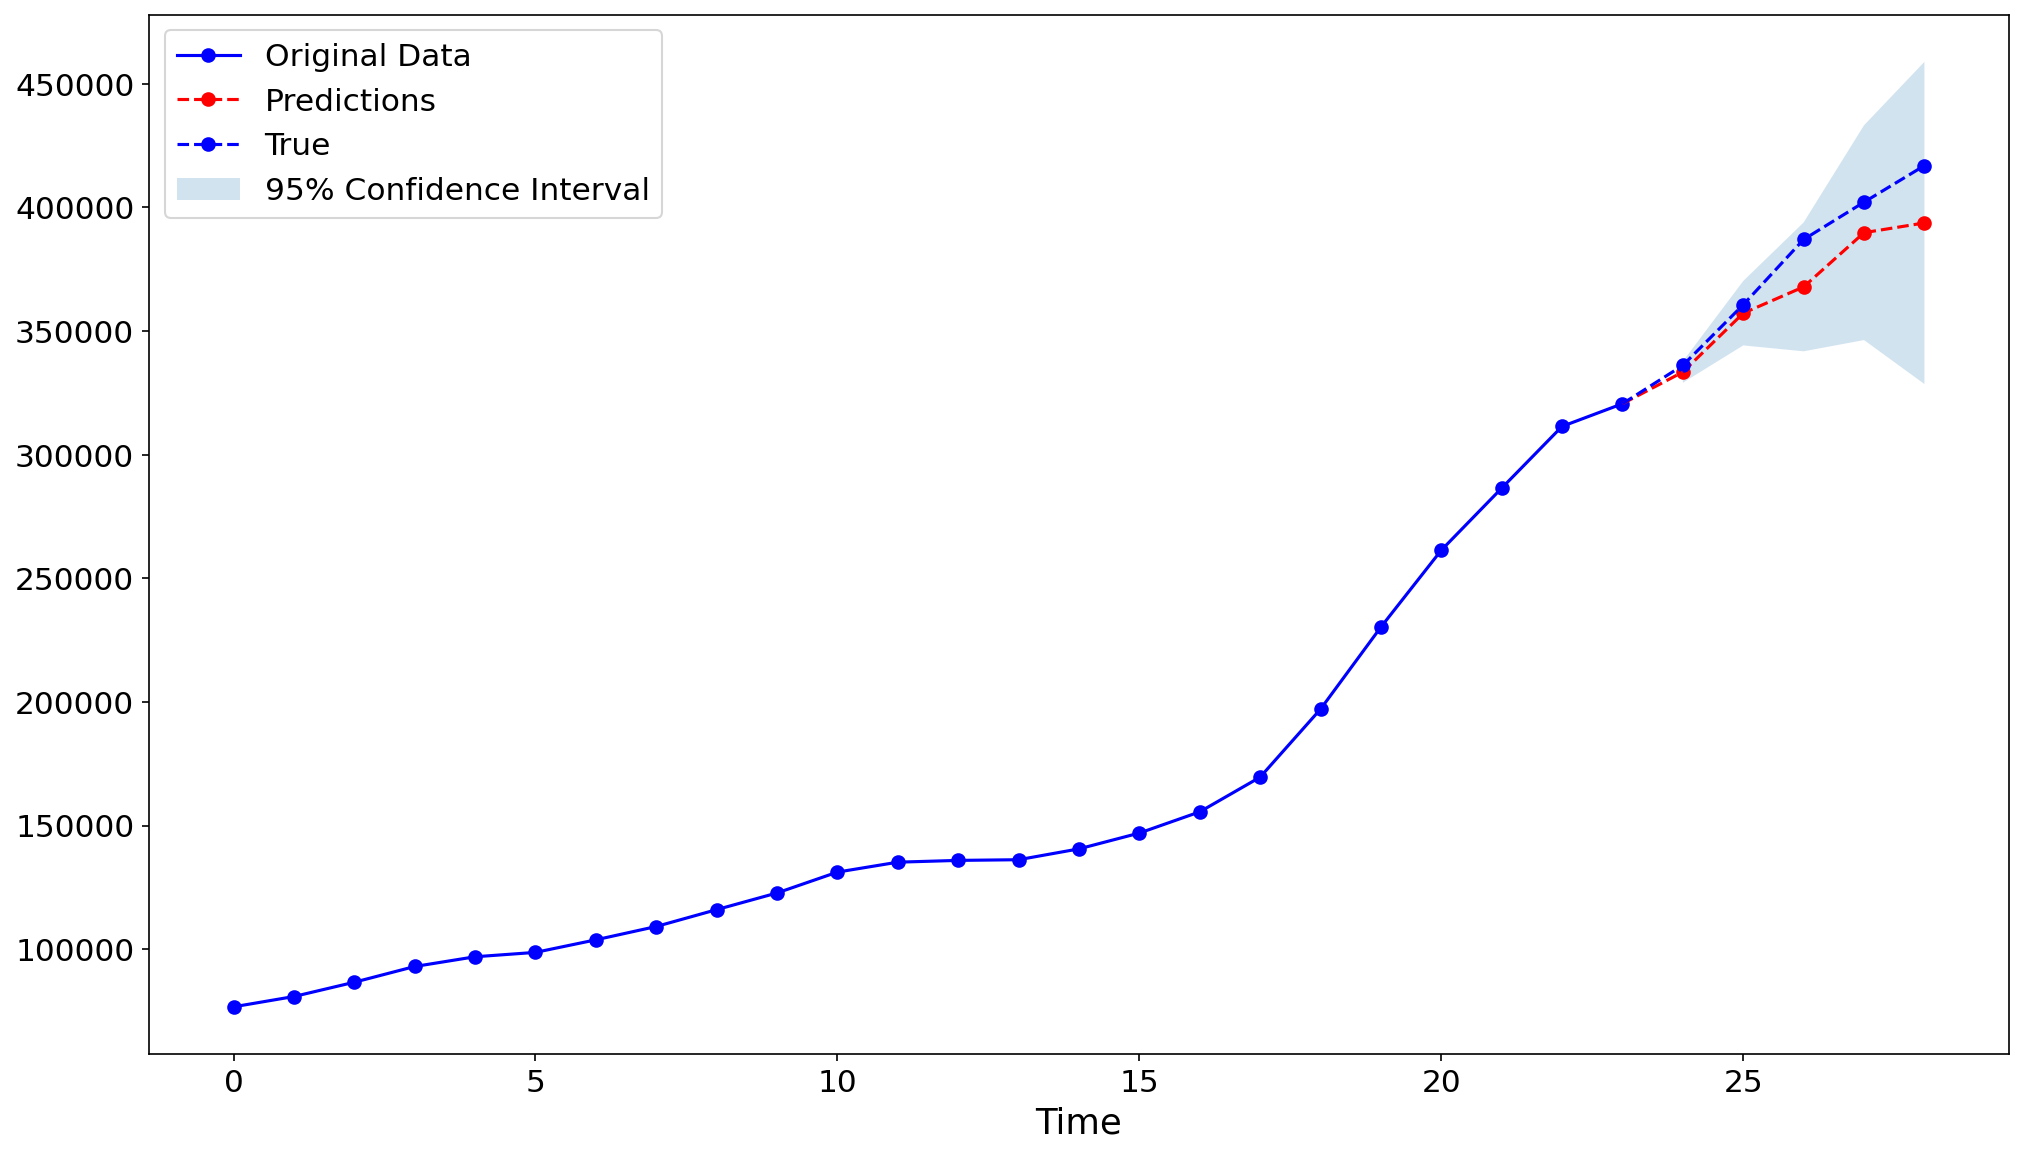

In [25]:
## 模型预测
forecast_steps = 5

# 进行预测
# 这里假设外生变量能源加工转换总效率(%)是过去五期数据
forecast = results.forecast(steps=forecast_steps, exog=[72,73,74,75,76])
EC_forecast = forecast[:, 0]
GDP_forecast = forecast[:, 1]

# 计算预测区间
EC_residuals = results.resid[:, 0]
GDP_residuals = results.resid[:, 1]

EC_residual_std = np.std(EC_residuals)
GDP_residual_std = np.std(GDP_residuals)

z_value = 1.96  

EC_forecast_mean = EC_forecast
EC_forecast_lower = EC_forecast_mean - z_value * EC_residual_std
EC_forecast_upper = EC_forecast_mean + z_value * EC_residual_std

EC_forecast_mean = np.cumsum(np.cumsum(EC_forecast_mean)) + (330000, 320000, 270000, 210000, 110000)
EC_forecast_lower = np.cumsum(np.cumsum(EC_forecast_lower)) + (330000, 320000, 270000, 210000, 110000)
EC_forecast_upper = np.cumsum(np.cumsum(EC_forecast_upper)) + (330000, 320000, 270000, 210000, 110000)

GDP_forecast_mean = GDP_forecast
GDP_forecast_lower = GDP_forecast_mean - z_value * GDP_residual_std
GDP_forecast_upper = GDP_forecast_mean + z_value * GDP_residual_std

GDP_forecast_mean = np.cumsum(np.cumsum(GDP_forecast_mean)) + (370000, 400000, 420000, 440000, 460000)
GDP_forecast_lower = np.cumsum(np.cumsum(GDP_forecast_lower)) + (370000, 400000, 420000, 440000, 460000)
GDP_forecast_upper = np.cumsum(np.cumsum(GDP_forecast_upper)) + (370000, 400000, 420000, 440000, 460000)
# 预测结果
EC_forecast_df = pd.DataFrame({
    '能源消费总量(万吨标准煤)_二阶差分预测值': EC_forecast_mean,
    '能源消费总量(万吨标准煤)_二阶差分预测区间下界': EC_forecast_lower,
    '能源消费总量(万吨标准煤)_二阶差分预测区间上界': EC_forecast_upper
})

print(EC_forecast_df)

# 真值
EC_true = (336126, 360648, 387043, 402138, 416913)
GDP_true = (348517.7, 412119.3, 487940.2, 538580, 592963.2)

# 绘图
plt.figure(figsize=(16, 9), dpi=150)
plt.plot(range(len(df['能源消费总量(万吨标准煤)'])), df['能源消费总量(万吨标准煤)'], linestyle='-', color='b', marker='o', markerfacecolor='b', label='Original Data')
plt.plot(range(len(df['能源消费总量(万吨标准煤)']), len(df['能源消费总量(万吨标准煤)']) + len(EC_forecast_df['能源消费总量(万吨标准煤)_二阶差分预测值'])), EC_forecast_df['能源消费总量(万吨标准煤)_二阶差分预测值'], linestyle='--', color='r', marker='o', markerfacecolor='r', label='Predictions')
plt.plot(range(len(df['能源消费总量(万吨标准煤)']), len(df['能源消费总量(万吨标准煤)']) + len(EC_forecast_df['能源消费总量(万吨标准煤)_二阶差分预测值'])), EC_true, linestyle='--', color='b', marker='o', markerfacecolor='b', label='True')
plt.fill_between(range(len(df['能源消费总量(万吨标准煤)']), len(df['能源消费总量(万吨标准煤)']) + len(EC_forecast_df['能源消费总量(万吨标准煤)_二阶差分预测值'])), EC_forecast_df['能源消费总量(万吨标准煤)_二阶差分预测区间下界'], EC_forecast_df['能源消费总量(万吨标准煤)_二阶差分预测区间上界'], alpha=0.2, label='95% Confidence Interval')
# 连接预测值
last_df_index = len(df['能源消费总量(万吨标准煤)']) - 1
last_df_value = df['能源消费总量(万吨标准煤)'][last_df_index]
first_forecast_value = EC_forecast_df['能源消费总量(万吨标准煤)_二阶差分预测值'][0]
plt.plot([last_df_index, last_df_index + 1], [last_df_value, first_forecast_value], linestyle='--', color='r', marker='')
# 连接真值
last_df_index = len(df['能源消费总量(万吨标准煤)']) - 1
last_df_value = df['能源消费总量(万吨标准煤)'][last_df_index]
first_true_value = EC_true[0]
plt.plot([last_df_index, last_df_index + 1], [last_df_value, first_true_value], linestyle='--', color='b', marker='')

plt.xlabel('Time', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15, loc='upper left')
plt.savefig(fname='能源消费总量预测结果与95%置信区间.png')

### 9.2 GDP的预测与真值比较

   GDP(亿元)_二阶差分预测值  GDP(亿元)_二阶差分预测区间下界  GDP(亿元)_二阶差分预测区间上界
0    365704.492641       357869.851434       373539.133849
1    404510.860883       381006.937261       428014.784505
2    447761.273671       400753.426428       494769.120915
3    502015.475988       423669.063915       580361.888060
4    566928.829063       449409.210954       684448.447172


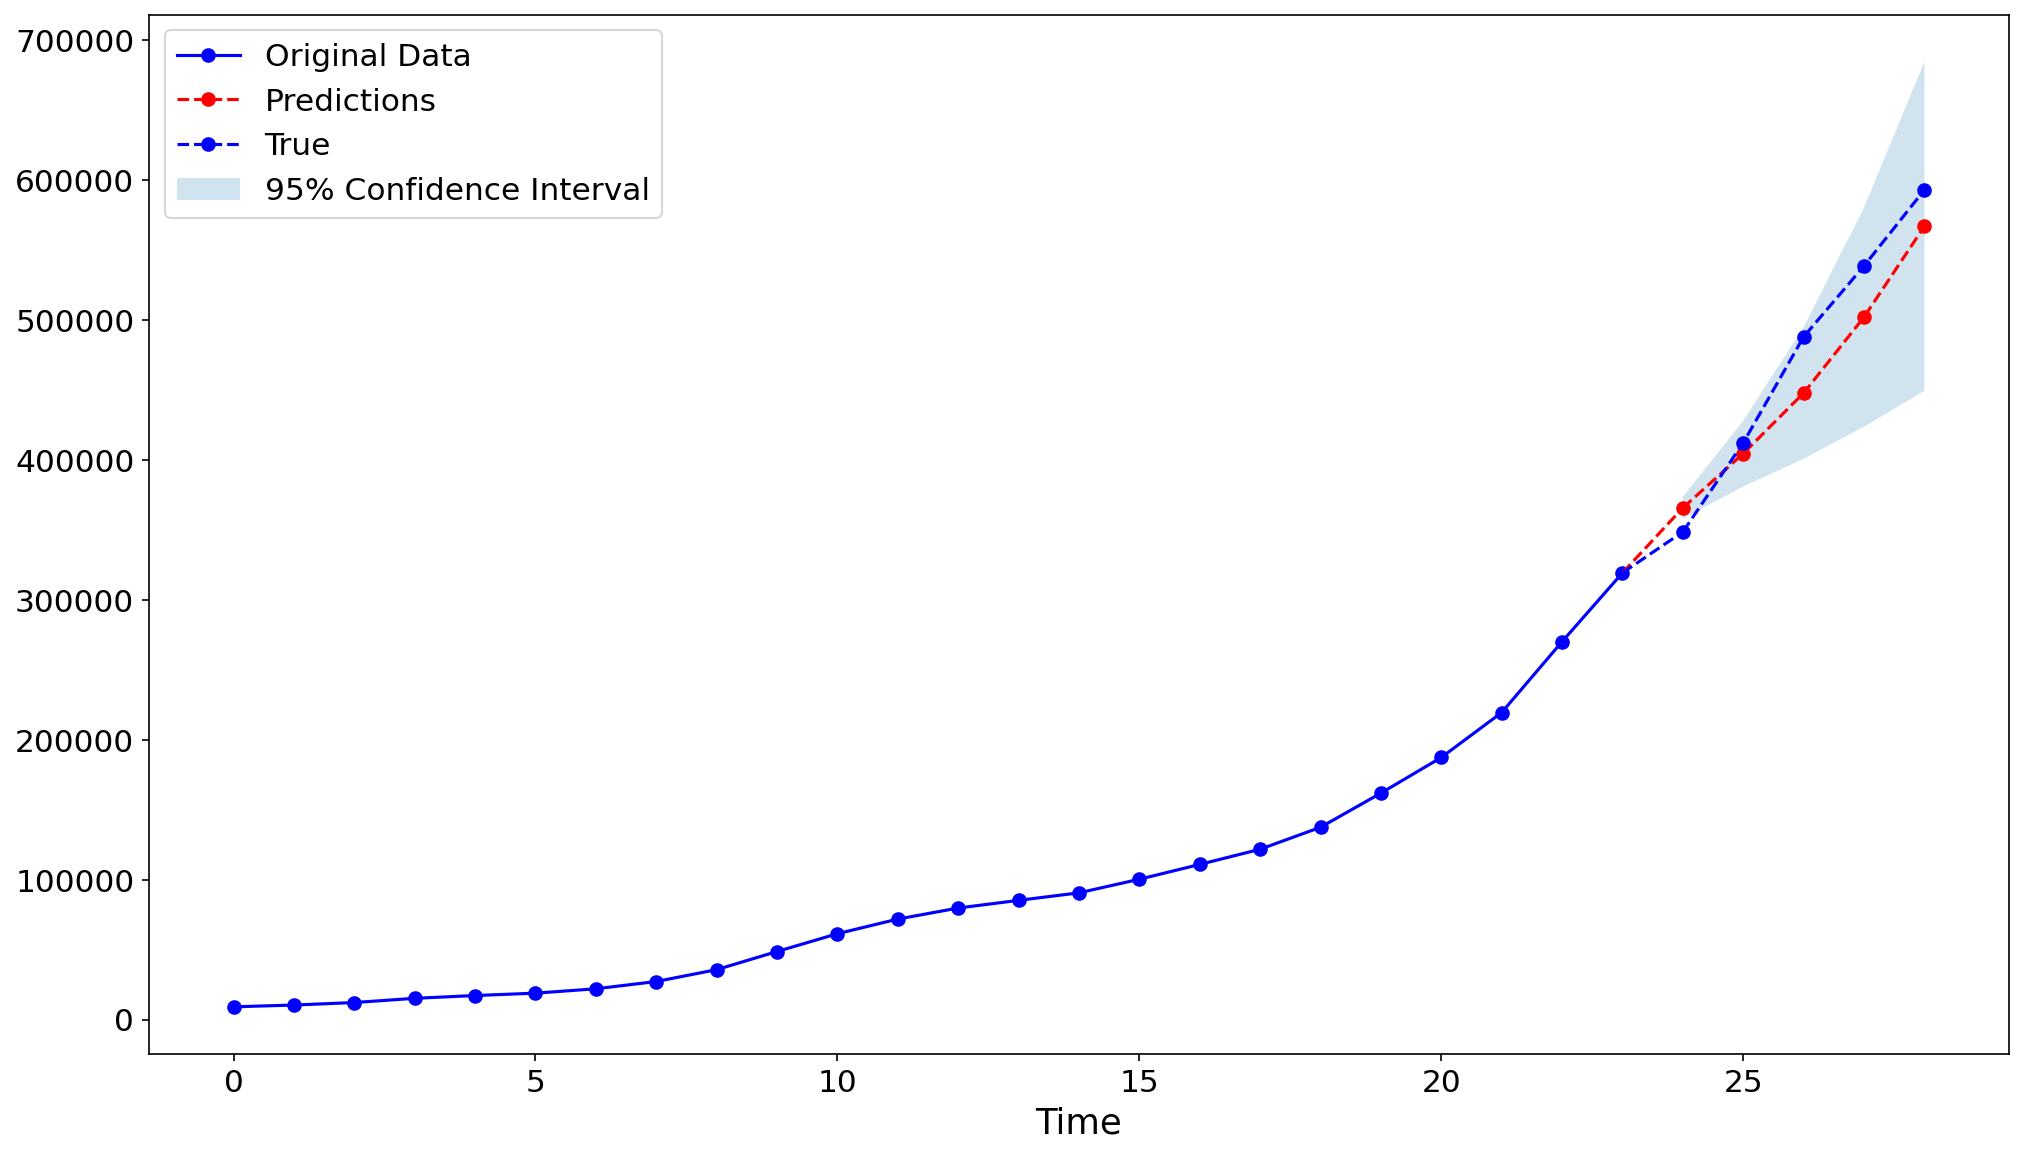

In [26]:
GDP_forecast_df = pd.DataFrame({
    'GDP(亿元)_二阶差分预测值': GDP_forecast_mean,
    'GDP(亿元)_二阶差分预测区间下界': GDP_forecast_lower,
    'GDP(亿元)_二阶差分预测区间上界': GDP_forecast_upper
})

print(GDP_forecast_df)


# 绘图
plt.figure(figsize=(16, 9), dpi=150)
plt.plot(range(len(df['GDP(亿元)'])), df['GDP(亿元)'], linestyle='-', color='b', marker='o', markerfacecolor='b', label='Original Data')
plt.plot(range(len(df['GDP(亿元)']), len(df['GDP(亿元)']) + len(GDP_forecast_df['GDP(亿元)_二阶差分预测值'])), GDP_forecast_df['GDP(亿元)_二阶差分预测值'], linestyle='--', color='r', marker='o', markerfacecolor='r', label='Predictions')
plt.plot(range(len(df['GDP(亿元)']), len(df['GDP(亿元)']) + len(GDP_forecast_df['GDP(亿元)_二阶差分预测值'])), GDP_true, linestyle='--', color='b', marker='o', markerfacecolor='b', label='True')
plt.fill_between(range(len(df['GDP(亿元)']), len(df['GDP(亿元)']) + len(GDP_forecast_df['GDP(亿元)_二阶差分预测值'])), GDP_forecast_df['GDP(亿元)_二阶差分预测区间下界'], GDP_forecast_df['GDP(亿元)_二阶差分预测区间上界'], alpha=0.2, label='95% Confidence Interval')
# 连接两组数据
last_df_index = len(df['GDP(亿元)']) - 1
last_df_value = df['GDP(亿元)'][last_df_index]
first_forecast_value = GDP_forecast_df['GDP(亿元)_二阶差分预测值'][0]
plt.plot([last_df_index, last_df_index + 1], [last_df_value, first_forecast_value], linestyle='--', color='r', marker='')
# 连接真值
last_df_index = len(df['GDP(亿元)']) - 1
last_df_value = df['GDP(亿元)'][last_df_index]
first_true_value = GDP_true[0]
plt.plot([last_df_index, last_df_index + 1], [last_df_value, first_true_value], linestyle='--', color='b', marker='')

plt.xlabel('Time', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15, loc='upper left')
plt.savefig(fname='GDP预测结果与95%置信区间.png')

## 十、参考文献

In [27]:
## Reference：[1]周灵颖.我国能源消费与经济增长的互动关系分析[D].华东交通大学,2011.